# Practical Session 9: `scipy` and `astropy`

### 1. Minimisation with `scipy.optimize.minimize`

The function below $h(x)$ represents the squared difference between the cube of $x$$ and 10:

```python
def h(x):
    return (x[0]**3 - 10)**2
```
Using an initial guess of `x0 = 2`, find the value of $x$ that minimises $h(x)$.

In [1]:
from scipy.optimize import minimize

def h(x):
    return (x[0]**3 - 10)**2

x0 = 2  # Initial guess

result = minimize(h, x0)

print(f"Minimum value found at x = {result.x[0]:.5f}")
print(f"Minimum h(x) = {result.fun:.5f}")

Minimum value found at x = 2.15443
Minimum h(x) = 0.00000


Plot $h(x)$ over the range $[1,3]$ and mark the minimum

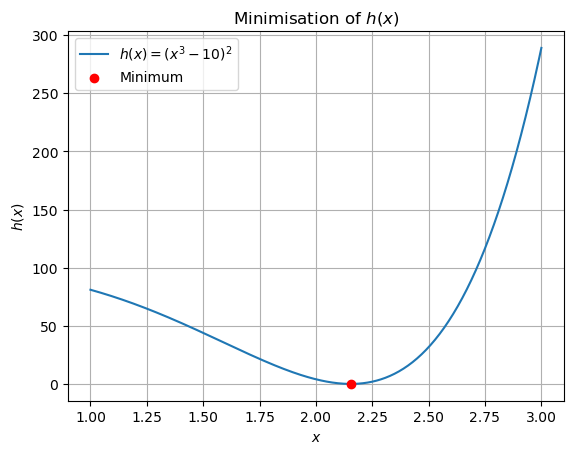

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmin = result.x[0]
hmin = result.fun

# Create x values and compute h(x)
x_vals = np.linspace(1, 3, 400)
h_vals = [(xi**3 - 10)**2 for xi in x_vals]

plt.plot(x_vals, h_vals, label='$h(x) = (x^3 - 10)^2$')
plt.scatter(xmin, hmin, color='red', zorder=5, label='Minimum')
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.title('Minimisation of $h(x)$')
plt.legend()
plt.grid(True)
plt.show()


### 2. Root finding with `scipy.optimize.root`

Define the function $f(x)=cos(x)−x$ and use `root` to find a root with initial guess $x_0 = 1.0$

In [3]:
from scipy.optimize import root

def f(x):
    return np.cos(x[0]) - x[0]

x0 = [1.0]
solution = root(f, x0)

print(f"Root found at x = {solution.x[0]:.6f}")

Root found at x = 0.739085


### 3. Curve fitting with `scipy.optimize.curve_fit`

You have been given some $x$ and $y$ data in the file `curve_fitting.csv`. Use `curve_fit` to fit:

- A linear function

- A quadratic function

- A third order polynomial

Find which gives the best fit. Plot the data with all three fits, with appropriate axes and legend.

Residual sum of squares:
Linear: 3902.8189
Quadratic: 1124.1540
Cubic: 941.7392


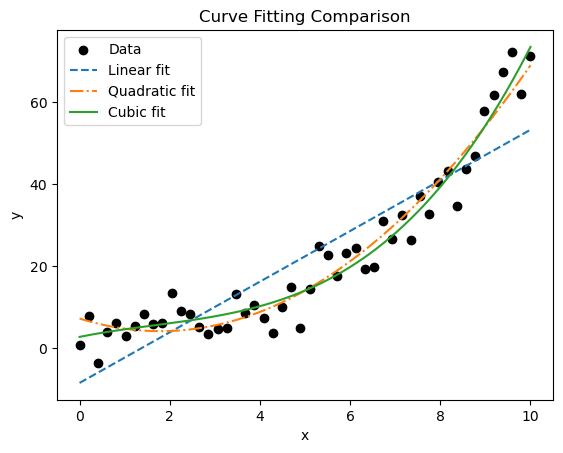

In [6]:
from scipy.optimize import curve_fit

# Load data
data = np.loadtxt('curve_fitting.csv', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

# Define models
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit models
p_linear, _ = curve_fit(linear, x, y)
p_quad, _ = curve_fit(quadratic, x, y)
p_cubic, _ = curve_fit(cubic, x, y)

# Compute residuals sum of squares for each fit
res_linear = np.sum((y - linear(x, *p_linear))**2)
res_quad = np.sum((y - quadratic(x, *p_quad))**2)
res_cubic = np.sum((y - cubic(x, *p_cubic))**2)

print(f"Residual sum of squares:")
print(f"Linear: {res_linear:.4f}")
print(f"Quadratic: {res_quad:.4f}")
print(f"Cubic: {res_cubic:.4f}")

# Plot data and fits
x_fit = np.linspace(min(x), max(x), 200)
plt.scatter(x, y, label='Data', color='black')

plt.plot(x_fit, linear(x_fit, *p_linear), label='Linear fit', linestyle='--')
plt.plot(x_fit, quadratic(x_fit, *p_quad), label='Quadratic fit', linestyle='-.')
plt.plot(x_fit, cubic(x_fit, *p_cubic), label='Cubic fit', linestyle='-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting Comparison')
plt.legend()
plt.show()


### 4. Integration with `scipy.integrate`

Calculate the integral of $f(x)=e^{-x^2}$ with both `quad` and `trapz`, compare your results.

In [7]:
from scipy.integrate import quad, trapezoid

# Define the function
def f(x):
    return np.exp(-x**2)

# Integration bounds
a, b = 0, 2

# Continuous integration with quad
result_quad, error_quad = quad(f, a, b)

# Discrete approximation with trapezoid
x_vals = np.linspace(a, b, 200)
y_vals = f(x_vals)
result_trapz = trapezoid(y_vals, x_vals)

# Output results
print(f"quad result: {result_quad:.6f}, error estimate: {error_quad:.2e}")
print(f"trapezoid result: {result_trapz:.6f}")


quad result: 0.882081, error estimate: 9.79e-15
trapezoid result: 0.882081


### 5. ODE solving for a damped harmonic oscillator

The motion of a damped harmonic oscillator is described by the second order ordinary differential equation (ODE):

$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + k x = 0
$$

where:

- $m = 1\, \text{kg}$ is the mass,
- $c = 0.2\, \text{kg/s}$ is the damping coefficient,
- $k = 2\, \text{N/m}$ is the spring constant,
- $x(t)$ is the displacement as a function of time $t$.

The solver `odeint` solves **systems of first order ODEs**, but here we have a **second order** ODE. 

To use `odeint`, we need to rewrite this second order equation as two **coupled first order ODEs**. 

Define:

$$
v = \frac{dx}{dt} \quad \Rightarrow \quad \frac{dv}{dt} = \frac{d^2x}{dt^2}
$$

Then the system becomes:

$$
\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{c}{m} v - \frac{k}{m} x
\end{cases}
$$

This is a system of two first order ODEs with variables $x$ and $v$.

**Define the function** that returns the derivatives $\frac{dx}{dt}$ and $\frac{dv}{dt}$ as a vector, e.g.

```python
def damped_oscillator(y, t, m, c, k):
    x, v = y
    dxdt = v
    dvdt = - (c/m) * v - (k/m) * x
    return [dxdt, dvdt]
```

Then with initial conditions $x(0)=1$m and $v(0)=0$m/s use `odeint` to solve the ODE between 0s to 20s.

In [9]:
from scipy.integrate import odeint

# Parameters
m = 1.0   # kg
c = 0.2   # kg/s
k = 2.0   # N/m

# System of first-order ODEs
def damped_oscillator(y, t, m, c, k):
    x, v = y
    dxdt = v
    dvdt = - (c/m) * v - (k/m) * x
    return [dxdt, dvdt]

# Time array
t = np.linspace(0, 20, 500)

# Initial conditions: x(0) = 1 m, v(0) = 0 m/s
y0 = [1.0, 0.0]

# Solve ODE
solution = odeint(damped_oscillator, y0, t, args=(m, c, k))

# Extract displacement and velocity
x = solution[:, 0]
v = solution[:, 1]


Using subplots, plot both $x(t)$ and $v(t)$ with appropiate formatting. Use the arguement `sharex=True` in `plt.subplots` to make both plots chare the same x axis.

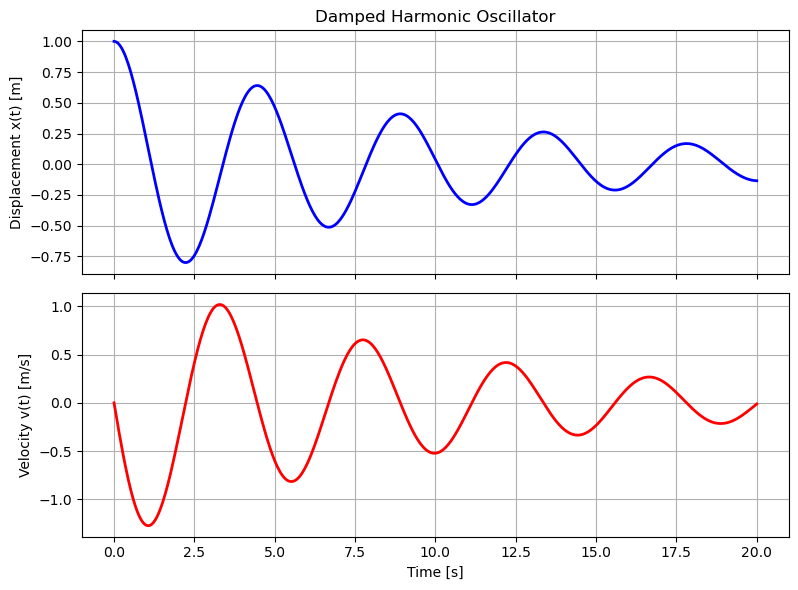

In [10]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Displacement plot
axs[0].plot(t, x, 'b-', linewidth=2)
axs[0].set_ylabel('Displacement x(t) [m]')
axs[0].set_title('Damped Harmonic Oscillator')
axs[0].grid(True)

# Velocity plot
axs[1].plot(t, v, 'r-', linewidth=2)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Velocity v(t) [m/s]')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Use `scipy.interpolate.interp1d` to create an interpolation function for $x(t)$, and use it to estimate and print the displacement at $t=7.5$ s and $t=15.3$ s.

In [12]:
from scipy.interpolate import interp1d

# Create interpolation function
interp_func = interp1d(t, x, kind='cubic')

# Estimate displacement at given times
t1 = 7.5
t2 = 15.3
x_t1 = interp_func(t1)
x_t2 = interp_func(t2)

print(f"Displacement at t = {t1} s: {x_t1:.6f} m")
print(f"Displacement at t = {t2} s: {x_t2:.6f} m")

Displacement at t = 7.5 s: -0.221315 m
Displacement at t = 15.3 s: -0.192687 m


### 6. Exploring a distant Quasar with `astropy`

A quasar was observed from an observatory located at latitude 34° N, longitude 118° W at UTC time **2025-10-15 03:30:00**. The observed position of the quasar in the sky is given in **altitude-azimuth coordinates** as:

- Altitude = 40°
- Azimuth = 150°

The quasar's redshift $z = 2.1$.

- Create an `astropy.time.Time` object for the UTC observation time.
   
- Convert this time to Julian Date (JD) and Modified Julian Date (MJD).
   
- Convert the time to Terrestrial Time (TT).

In [13]:
from astropy.time import Time

# Observation time in UTC
obs_time_utc = Time("2025-10-15 03:30:00", scale="utc")

# Julian Date (JD) and Modified Julian Date (MJD)
jd = obs_time_utc.jd
mjd = obs_time_utc.mjd

# Convert to Terrestrial Time (TT)
obs_time_tt = obs_time_utc.tt

# Print results
print(f"UTC observation time: {obs_time_utc}")
print(f"Julian Date (JD): {jd}")
print(f"Modified Julian Date (MJD): {mjd}")
print(f"Terrestrial Time (TT): {obs_time_tt}")


UTC observation time: 2025-10-15 03:30:00.000
Julian Date (JD): 2460963.6458333335
Modified Julian Date (MJD): 60963.145833333336
Terrestrial Time (TT): 2025-10-15 03:31:09.184


- Define the observer’s location using `EarthLocation`.

- Create an `AltAz` coordinate object with the given altitude, azimuth, time, and location.

- Convert the quasar’s position to the **ICRS frame** (Right Ascension and Declination).

- Print the RA and Dec in degrees.

In [14]:
from astropy.coordinates import EarthLocation, AltAz, SkyCoord
import astropy.units as u

# Observation time in UTC
obs_time_utc = Time("2025-10-15 03:30:00", scale="utc")

# Define observer's location (Pasadena, CA, ~34°N, 118°W)
location = EarthLocation(lat=34.0*u.deg, lon=-118.0*u.deg, height=0*u.m)

# Given altitude and azimuth
alt = 40.0 * u.deg
az = 150.0 * u.deg

# Create AltAz coordinate
altaz_coord = SkyCoord(alt=alt, az=az, frame=AltAz(obstime=obs_time_utc, location=location))

# Convert to ICRS (Right Ascension, Declination)
icrs_coord = altaz_coord.icrs

# Print RA and Dec
print(f"Right Ascension (deg): {icrs_coord.ra.deg:.6f}")
print(f"Declination (deg): {icrs_coord.dec.deg:.6f}")


Right Ascension (deg): 341.045667
Declination (deg): -11.121749


- Using the Planck18 cosmology model, calculate:

     - The luminosity distance,

     - The angular diameter distance,

     - The age of the Universe at the quasar’s redshift.

- Express the distances in megaparsecs (Mpc) and the age in gigayears (Gyr).


In [15]:
from astropy.cosmology import Planck18 as cosmo

z = 2.1

# Luminosity distance
d_l = cosmo.luminosity_distance(z)        # astropy Quantity

# Angular diameter distance
d_a = cosmo.angular_diameter_distance(z)  # astropy Quantity

# Age of the Universe at redshift z
age_z = cosmo.age(z)                      # astropy Quantity

# Convert to requested units and print
print(f"Luminosity distance at z={z}: {d_l.to(u.Mpc):.3f}")
print(f"Angular diameter distance at z={z}: {d_a.to(u.Mpc):.3f}")
print(f"Age of the Universe at z={z}: {age_z.to(u.Gyr):.3f}")


Luminosity distance at z=2.1: 16900.582 Mpc
Angular diameter distance at z=2.1: 1758.645 Mpc
Age of the Universe at z=2.1: 3.123 Gyr


   - The quasar has an observed flux of $3.5 \times 10^{-16}$ erg/s/cm².

   - Convert this flux to SI units (W/m²).
   
   - Using the luminosity distance, calculate the quasar’s luminosity in watts (W).

     *Hint:* Luminosity $L$ relates to flux $F$ and luminosity distance $D_L$ by:  
     $$
     L = 4 \pi D_L^2 \times F
     $$

In [16]:
# Observed flux in cgs units
flux_cgs = 3.5e-16 * u.erg / u.s / (u.cm**2)

# Convert to SI units (W/m²)
flux_si = flux_cgs.to(u.W / (u.m**2))
print(f"Flux in SI units: {flux_si:.3e}")

# Luminosity distance in meters
D_L_m = d_l.to(u.m)

# Luminosity calculation: L = 4π D_L² × F
luminosity = 4 * np.pi * D_L_m**2 * flux_si
print(f"Luminosity: {luminosity.to(u.W):.3e}")


Flux in SI units: 3.500e-19 W / m2
Luminosity: 1.196e+36 W
